 #                                           Pima Indian Diabetese prediction

In [1]:
## Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
## read the first five records of the dataset

In [4]:
data = pd.read_csv("diabetes.csv")
data.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        0  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [5]:
## check the value counts of the target variable

In [6]:
data['Outcome'].value_counts()

Outcome
0    502
1    266
Name: count, dtype: int64

In [7]:
## check the information about the dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
## describe summary statistics ofthe dataset

In [10]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.346354  
std      7.884160                  0.331329   11.760232    0.476118  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [11]:
## splitting the dataset into training and testing set

In [12]:
from sklearn.model_selection import train_test_split
training_set, testing_set= train_test_split(data, test_size=0.2, random_state=42)
training_set.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
60             2       84              0              0        0   0.0   
618            9      112             82             24        0  28.2   
346            1      139             46             19       83  28.7   
294            0      161             50              0        0  21.9   
231            6      134             80             37      370  46.2   

     DiabetesPedigreeFunction  Age  Outcome  
60                      0.304   21        0  
618                     1.282   50        1  
346                     0.654   22        0  
294                     0.254   65        0  
231                     0.238   46        1

In [13]:
## Seperate into the target and independent variable from dataset

In [14]:
X= training_set.iloc[:,0:8]
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
60             2       84              0              0        0   0.0   
618            9      112             82             24        0  28.2   
346            1      139             46             19       83  28.7   
294            0      161             50              0        0  21.9   
231            6      134             80             37      370  46.2   

     DiabetesPedigreeFunction  Age  
60                      0.304   21  
618                     1.282   50  
346                     0.654   22  
294                     0.254   65  
231                     0.238   46

In [15]:
y= training_set.iloc[:,8]
y.head()

60     0
618    1
346    0
294    0
231    1
Name: Outcome, dtype: int64

## Explotary Data Analysis (EDA)

In [16]:
## pot the scatterplot diagram

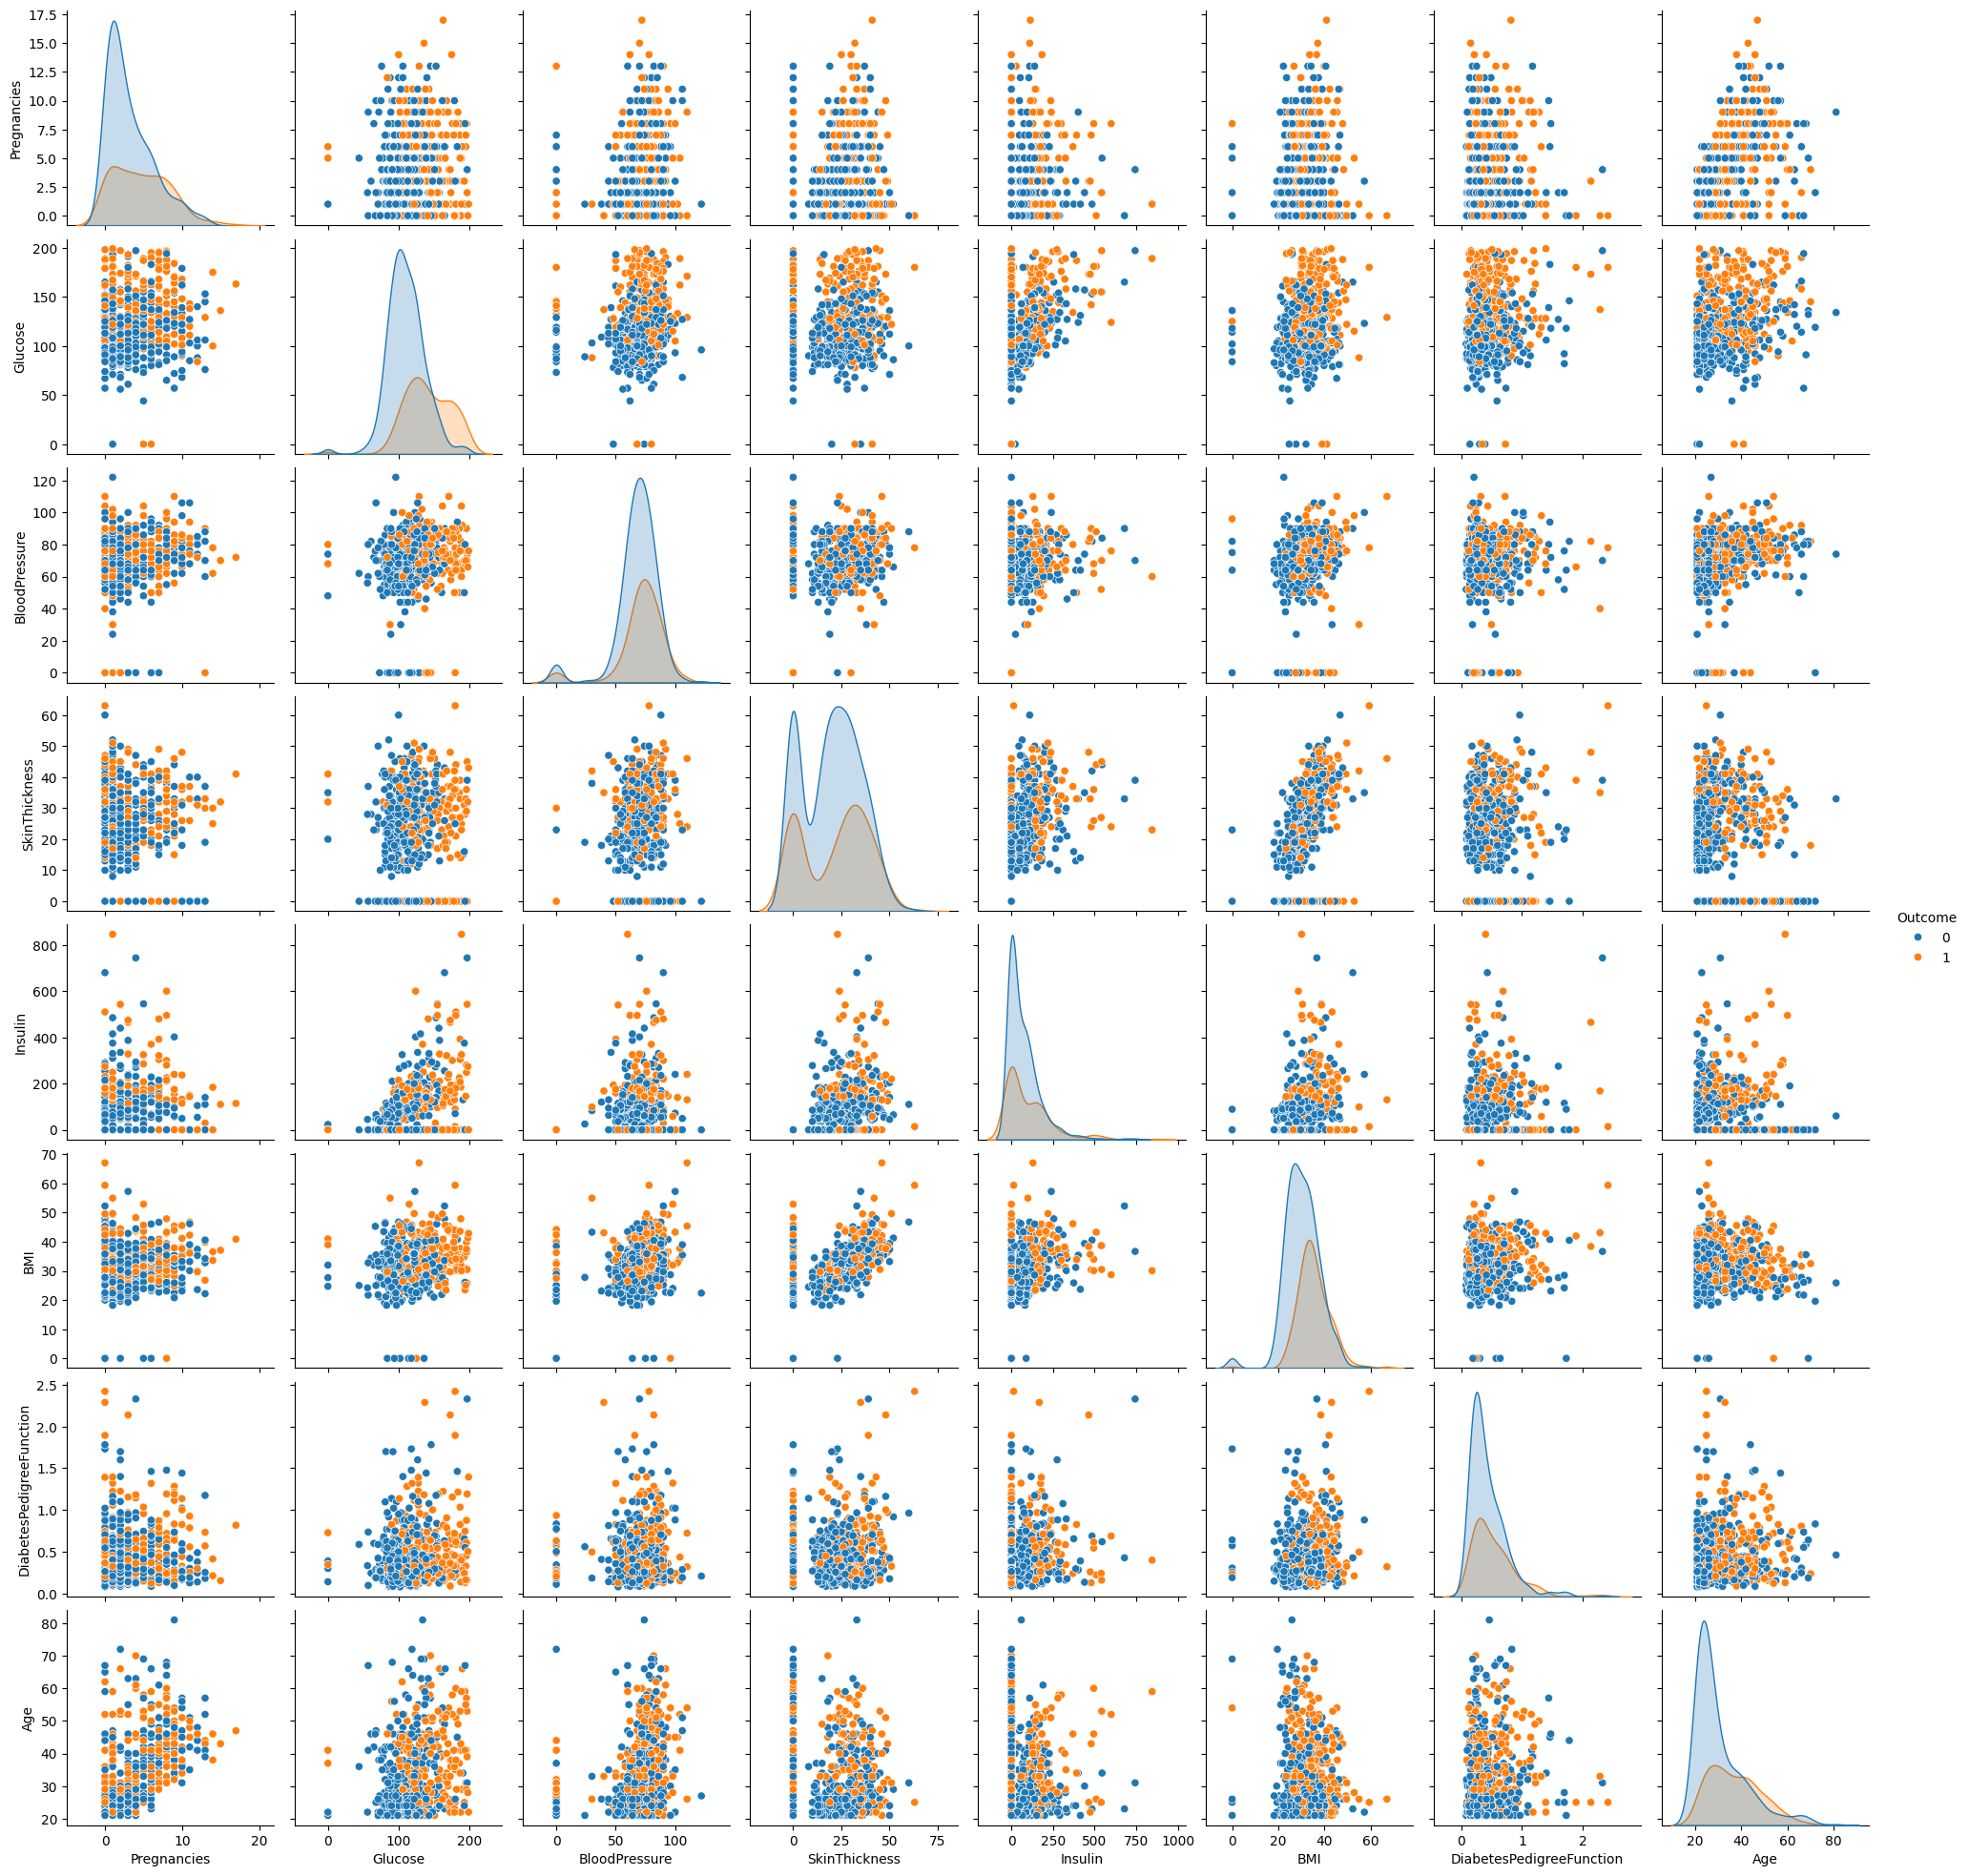

In [17]:
sns.pairplot(training_set, hue='Outcome')

In [18]:
## Correlational Coefficiency

In [19]:
corr = training_set.corr()
corr

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.142507       0.157544      -0.070691   
Glucose                      0.142507  1.000000       0.158320       0.017320   
BloodPressure                0.157544  0.158320       1.000000       0.178062   
SkinThickness               -0.070691  0.017320       0.178062       1.000000   
Insulin                     -0.066401  0.337064       0.085834       0.437564   
BMI                          0.027197  0.205162       0.250012       0.386223   
DiabetesPedigreeFunction    -0.018944  0.141597       0.044826       0.174623   
Age                          0.553048  0.270740       0.239588      -0.149863   
Outcome                      0.208516  0.453676       0.083495       0.059331   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.066401  0.027197                 -0.018944   
Glucose                   0.337064  0.205162                  0.141597   
BloodPressure             0.085834  0.250012                  0.044826   
SkinThickness             0.437564  0.386223                  0.174623   
Insulin                   1.000000  0.196035                  0.158923   
BMI                       0.196035  1.000000                  0.131945   
DiabetesPedigreeFunction  0.158923  0.131945                  1.000000   
Age                      -0.043823  0.004453                  0.020052   
Outcome                   0.113549  0.307137                  0.154521   

                               Age   Outcome  
Pregnancies               0.553048  0.208516  
Glucose                   0.270740  0.453676  
BloodPressure             0.239588  0.083495  
SkinThickness            -0.149863  0.059331  
Insulin                  -0.043823  0.113549  
BMI                       0.004453  0.307137  
DiabetesPedigreeFunction  0.020052  0.154521  
Age                       1.000000  0.271976  
Outcome                   0.271976  1.000000

In [20]:
## split the dataset into training and testing set

In [21]:
from sklearn.model_selection import train_test_split

X_train_new,X_test_new,y_train_new,y_test_new = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train_new.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
140            3      128             78              0        0  21.1   
735            4       95             60             32        0  35.4   
100            1      163             72              0        0  39.0   
574            1      143             86             30      330  30.1   
693            7      129             68             49      125  38.5   

     DiabetesPedigreeFunction  Age  
140                     0.268   55  
735                     0.284   28  
100                     1.222   33  
574                     0.892   23  
693                     0.439   43

In [23]:
y_test_new.head()

370    1
53     1
644    0
71     0
675    1
Name: Outcome, dtype: int64

In [24]:
## Decision tree model for predictions

In [25]:
from sklearn.tree import DecisionTreeClassifier

model= DecisionTreeClassifier()
model.fit(X_train_new,y_train_new)

DecisionTreeClassifier()

In [26]:
pred = model.predict(X_test_new)
pred


array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [27]:
## DecisionTreeClassifier accuracy

In [28]:
DTC_accuracy = accuracy_score(y_test_new, pred)
DTC_accuracy

0.6422764227642277

In [29]:
## DecisionTreeClassifier confusion matrix

In [30]:
DTC_confusion_matrix = confusion_matrix(y_test_new,pred)

In [31]:
DTC_confusion_matrix

array([[60, 21],
       [23, 19]], dtype=int64)

#### DecisionTreeClassifier classification_report

In [32]:
DTF_classification_report = classification_report(y_test_new,pred)
print(DTF_classification_report)

              precision    recall  f1-score   support

           0       0.72      0.74      0.73        81
           1       0.47      0.45      0.46        42

    accuracy                           0.64       123
   macro avg       0.60      0.60      0.60       123
weighted avg       0.64      0.64      0.64       123



In [33]:
## Random Forest model for predictions

In [34]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier()
model1.fit(X_train_new,y_train_new)

RandomForestClassifier()

In [35]:
predictions = model1.predict(X_test_new)
predictions

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [36]:
RFC_accuracy =accuracy_score(y_test_new,pred)
RFC_accuracy

0.6422764227642277

In [37]:
## RandomForestClassifier  confusion_matrix

In [38]:
RFC_confusion_matrix = confusion_matrix(y_test_new,pred)
RFC_confusion_matrix

array([[60, 21],
       [23, 19]], dtype=int64)

#### RandomForest Classification Report

In [39]:
## Classification_Report

In [40]:
RFC_classification_report = classification_report(y_test_new,pred)
print(RFC_classification_report)

              precision    recall  f1-score   support

           0       0.72      0.74      0.73        81
           1       0.47      0.45      0.46        42

    accuracy                           0.64       123
   macro avg       0.60      0.60      0.60       123
weighted avg       0.64      0.64      0.64       123



In [41]:
## K-Nearst Neighbor Algorithm

In [42]:
from sklearn.neighbors import KNeighborsClassifier

model2= KNeighborsClassifier(n_neighbors=50)
model2.fit(X_train_new,y_train_new)


KNeighborsClassifier(n_neighbors=50)

In [43]:
## Make the predictions

In [44]:
predictions = model2.predict(X_test_new)
predictions

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [45]:
## KNeighborClassifier model accuracy

In [46]:
KNN_accuracy =accuracy_score(y_test_new,pred)
KNN_accuracy

0.6422764227642277

In [47]:
## KNeighborClassifier confusion_matrix 

In [48]:
KNN_confusion_matrix = confusion_matrix(y_test_new,pred)
KNN_confusion_matrix

array([[60, 21],
       [23, 19]], dtype=int64)

### KNeighbor Classification R

In [49]:
## KNeighborClassifier classification_report

In [50]:
KNN_classification_report = classification_report(y_test_new,pred)
print(KNN_classification_report)

              precision    recall  f1-score   support

           0       0.72      0.74      0.73        81
           1       0.47      0.45      0.46        42

    accuracy                           0.64       123
   macro avg       0.60      0.60      0.60       123
weighted avg       0.64      0.64      0.64       123



In [51]:
## SupportVectorMachine Classifier

In [52]:
from sklearn.svm import SVC
model3= SVC()
model3.fit(X_train_new,y_train_new)

SVC()

In [53]:
## accuracy of SVC

In [54]:
SVC_accuracy = accuracy_score(y_test_new,pred)
SVC_accuracy


0.6422764227642277

In [55]:
## SVC confusion matrix

In [56]:
SVC_confusion_matrix = confusion_matrix(y_test_new,pred)
SVC_confusion_matrix

array([[60, 21],
       [23, 19]], dtype=int64)

#### Support Vector Classifier Classification Report

In [57]:
## SVC classification report

In [58]:
SVC_classification_report = classification_report(y_test_new,pred)
print(SVC_classification_report)

              precision    recall  f1-score   support

           0       0.72      0.74      0.73        81
           1       0.47      0.45      0.46        42

    accuracy                           0.64       123
   macro avg       0.60      0.60      0.60       123
weighted avg       0.64      0.64      0.64       123



## Cross Validation technique

In [59]:
## use the cross-validation technique

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
from sklearn.neighbors import KNeighborsClassifier

kn_model = KNeighborsClassifier(n_neighbors=50)
cross_val_score(kn_model, X,y, cv=5).mean()

0.7150339864054378

In [62]:
from sklearn.tree import DecisionTreeClassifier

dtc_model = DecisionTreeClassifier(criterion="gini", splitter="best", min_samples_split=10)
cross_val_score(dtc_model, X,y, cv=5).mean()

0.7083699853391977

In [63]:
from sklearn.ensemble import RandomForestClassifier

rfc_model =RandomForestClassifier(n_estimators=2000,max_depth=200, min_samples_split=100, criterion="gini")
cross_val_score(rfc_model, X,y, cv=5).mean()

0.7590030654404905

In [64]:
from sklearn.svm import SVC
svc_model =SVC(kernel='poly',C=10.0)
cross_val_score(svc_model, X,y, cv=5).mean()


0.7573370651739304

## Grid Search  CV

In [65]:
## Grid Search  CV
from sklearn.model_selection import GridSearchCV

In [66]:
## Grid Search CV for svc

In [67]:
param_grids= {'C':[0.1,1,10,20,30,40,50], 'kernel':['rbf','linear','poly']}


In [68]:
svc_grid_search_cv = GridSearchCV(estimator=model3, param_grid=param_grids)
svc_grid_search_cv.fit(X_train_new,y_train_new)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 20, 30, 40, 50],
                         'kernel': ['rbf', 'linear', 'poly']})

In [69]:
## identify the best parameters for SVC

In [70]:
svc_grid_search_cv.best_params_

{'C': 10, 'kernel': 'poly'}

In [71]:
svc_grid_search_cv.score(X_test_new,y_test_new)

0.7723577235772358

In [72]:
## Grid Search  CV for K nears neighbor algorithm

In [73]:
param_grids= {'n_neighbors' :[10,20,30,40,50,60,70,80,90,100], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [74]:
k_neighbor_grid_cv =GridSearchCV(estimator=model2, param_grid=param_grids)
k_neighbor_grid_cv.fit(X_train_new,y_train_new)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=50),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                         100]})

In [75]:
k_neighbor_grid_cv.best_params_

{'algorithm': 'auto', 'n_neighbors': 30}

In [76]:
k_neighbor_grid_cv.score(X_test_new,y_test_new)

0.7317073170731707

In [77]:
## Grid Search  CV  for RandomForestClassifier

In [78]:
param_grids = {'n_estimators':[100,200,300,400,500], 'criterion':["gini", "entropy", "log_loss"], 'max_depth':[10,20,30,40,50]}

In [79]:
rfc_grid_search_cv= GridSearchCV(estimator=model1, param_grid=param_grids)
rfc_grid_search_cv.fit(X_train_new,y_train_new)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [80]:
rfc_grid_search_cv.best_params_

{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 500}

In [81]:
rfc_grid_search_cv.score(X_test_new,y_test_new)

0.7479674796747967

In [82]:
rfc_grid_search_cv_pred = rfc_grid_search_cv.predict(X_test_new)
rfc_grid_search_cv_pred

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [83]:
rfc_grid_search_cv_confusion_matrix = confusion_matrix(y_test_new, rfc_grid_search_cv_pred)
rfc_grid_search_cv_confusion_matrix

array([[70, 11],
       [20, 22]], dtype=int64)

In [84]:
## Grid search cv for DecisionTreeClassifier

In [85]:
param_grids = { 'criterion':["gini", "entropy", "log_loss"], 'splitter':["best", "random"], 'max_depth':[10,20,30,40,50], 'min_samples_split':[2,4,6,8,10]}

In [86]:
dtc_grid_search_cv= GridSearchCV(estimator=model, param_grid=param_grids)
dtc_grid_search_cv.fit(X_train_new,y_train_new)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'splitter': ['best', 'random']})

In [87]:
dtc_grid_search_cv.best_params_

{'criterion': 'gini',
 'max_depth': 40,
 'min_samples_split': 10,
 'splitter': 'best'}

In [88]:
dtc_grid_search_cv.score(X_test_new,y_test_new)

0.6341463414634146

## Explotary Data Analysis (EDA) for test dataset

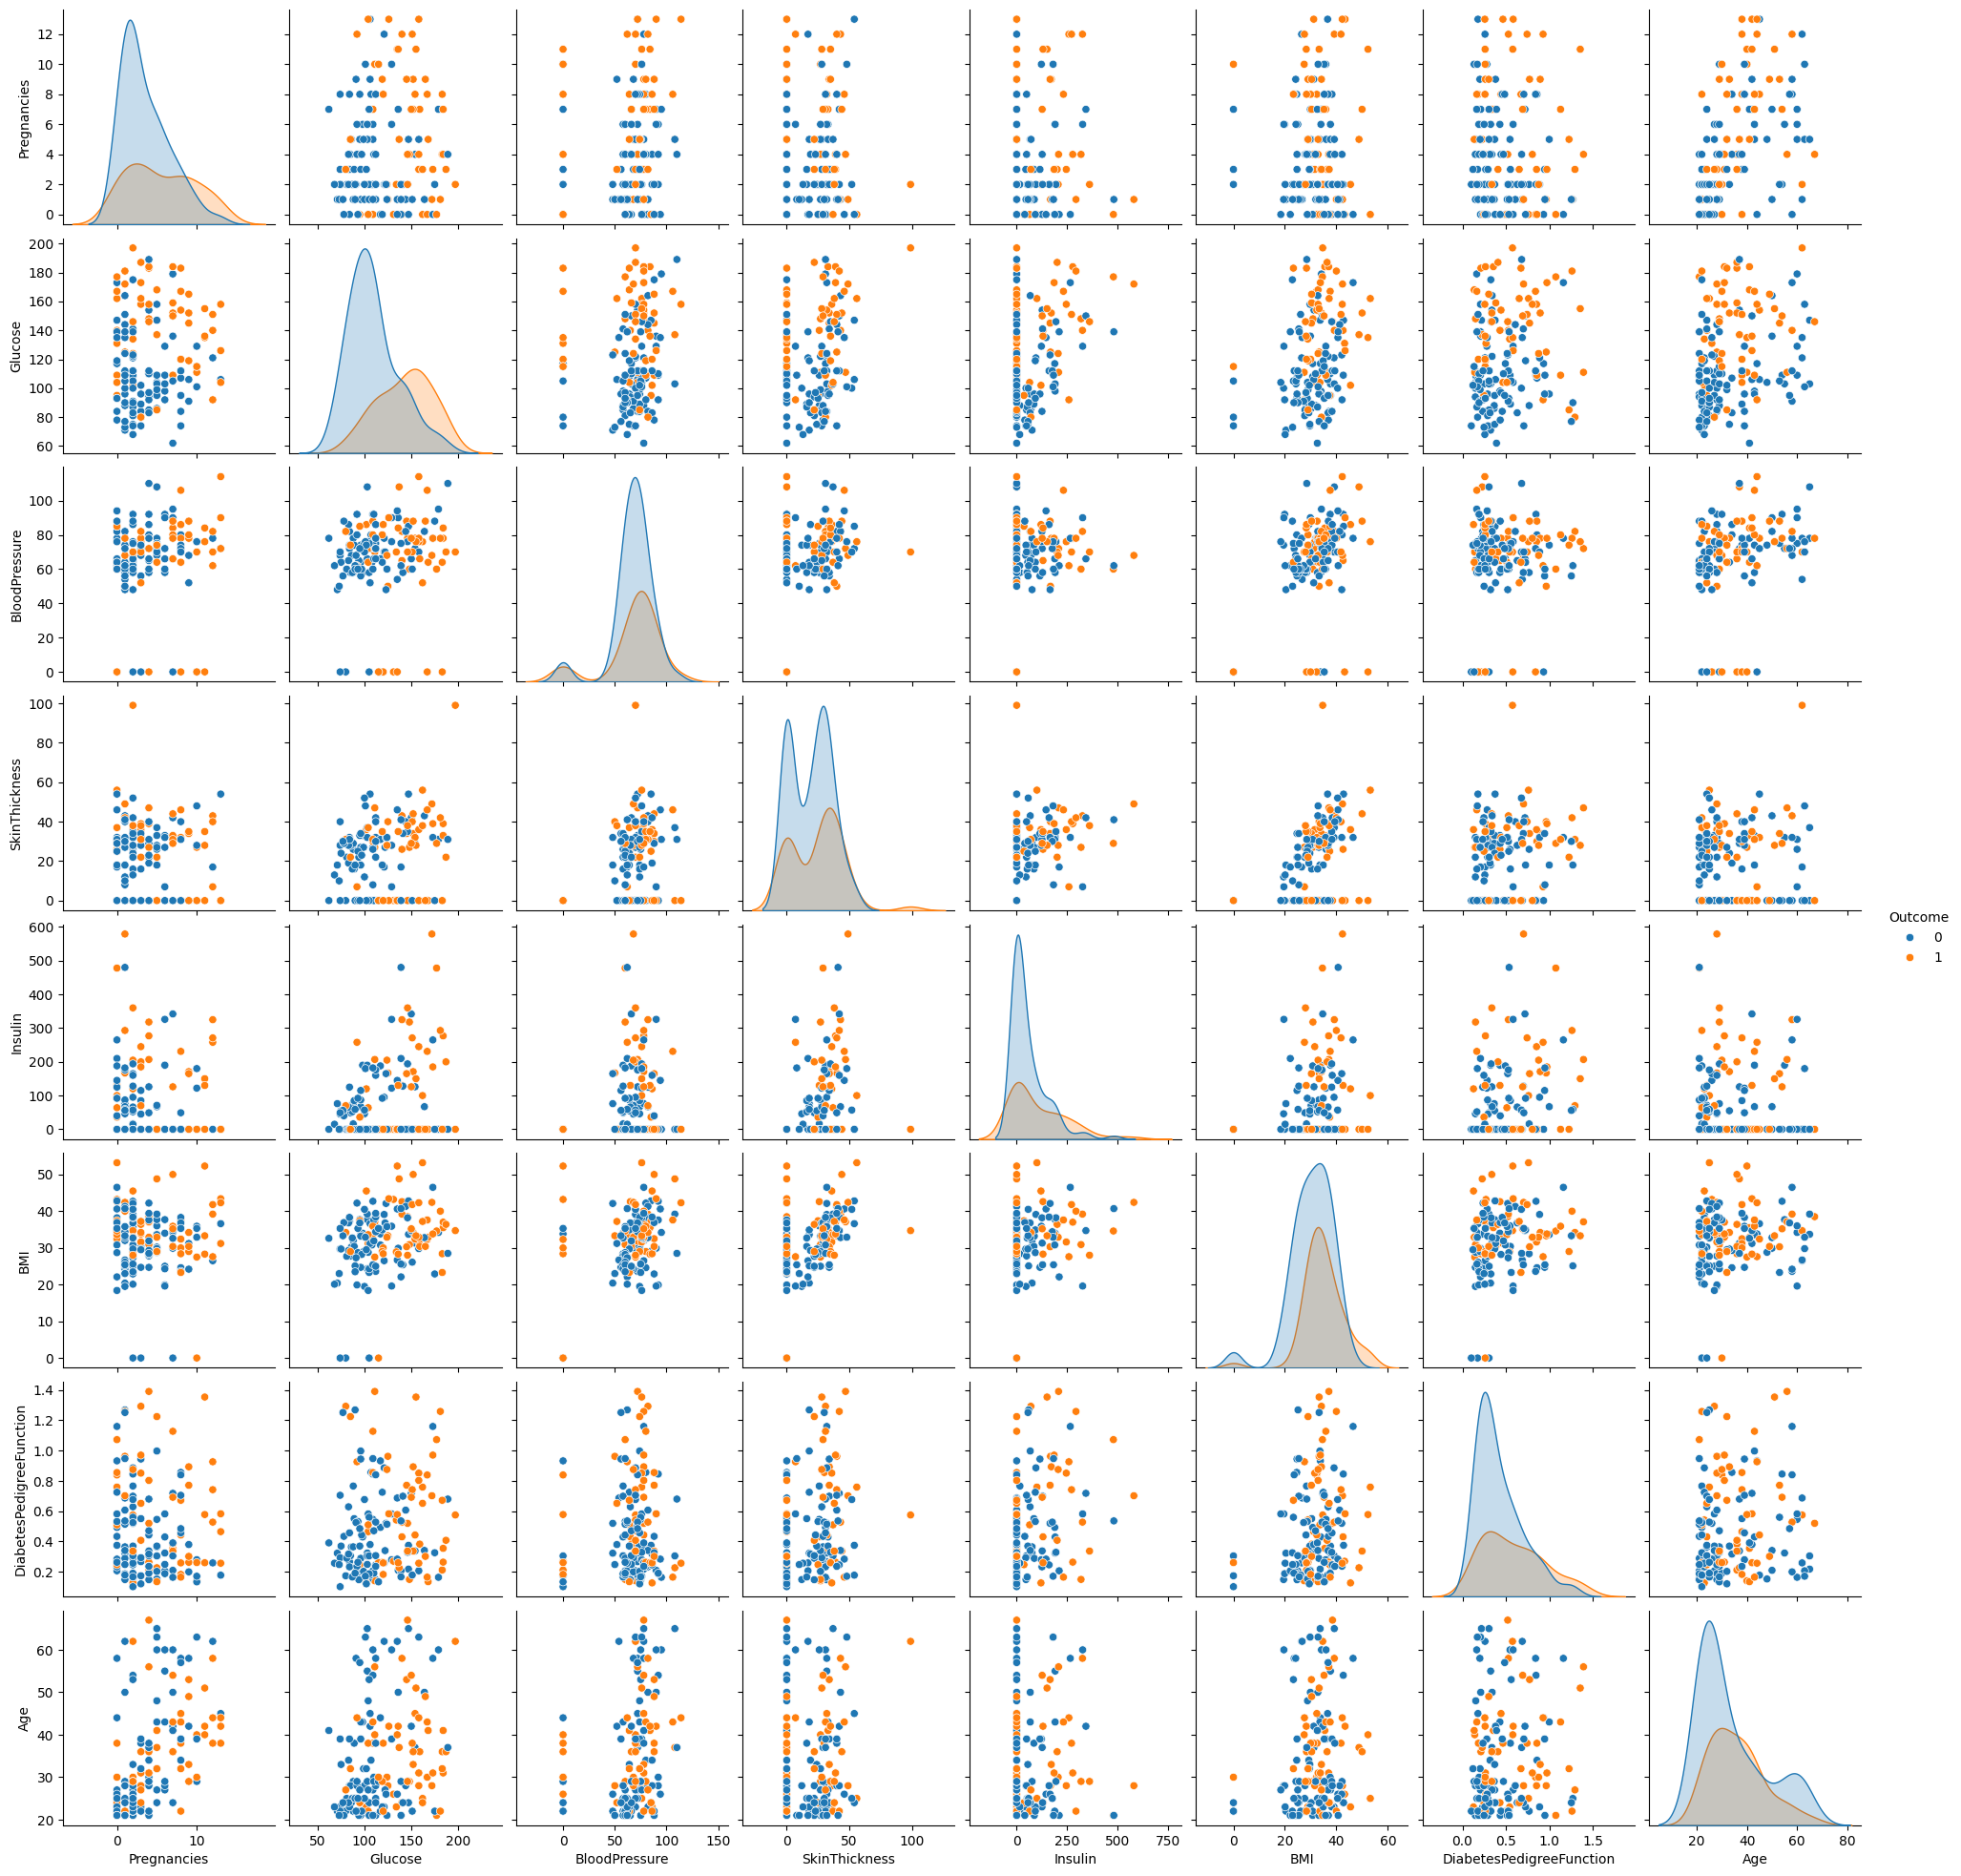

In [93]:
sns.pairplot(testing_set, hue="Outcome")

In [89]:
# 6	148	72	35	0	33.6	0.627	50	
# 1	85	66	29	0	26.6	0.351	31
# 0	137	40	35	168	43.1	2.288	33	
#10	115	0	0	0	35.3	0.134	29	
# 5	116	74	0	0	25.6	0.201	30	
# 8	125	96	0	0	0.0	    0.232	54	
# 1	89	66	23	94	28.1	0.167	21	
# 1 126	60	0	0	30.1	0.349	47
# 1	89	66	23	94	28.1	0.167	21
# 2	88	58	26	16	28.4	0.766	22	
# 9	170	74	31	0	44	    0.403	43	
# 6	190	92	0	0	35.5	0.278	66	
# 0	181	88	44	510	43.3	0.222	26	
# 1	121	78	39	74	39	    0.261   28
# 2	197	70	45	543	30.5	0.158	53	
#10 168	74	0	0	38	    0.537	34	
sample_data = [[2,197,70,45,543,30.5,0.158,53]]
predictions = k_neighbor_grid_cv.predict(sample_data)
if predictions[0]==0:
    print("Diabetese is not predicted")
else:
    print("Diabetese is predicted")

Diabetese is predicted


C:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [90]:
import pickle

pickle.dump(k_neighbor_grid_cv, open('./pickle.h5', 'wb'))